## Bike rental demand prediction using Machine Learning (ML)

### Exploratory Data Analysis(EDA)
In this project, The challenge is to build and train a regression model on the Capital Bike Share in Washington D.C Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time and weather.

### Data Set Information:

+ **datetime** : date
+ **season** : 1:spring, 2:summer, 3:fall, 4:winter
+ **yr** : year (0: 2011, 1:2012)
+ **mnth** : month ( 1 to 12)
+ **hr** : hour (0 to 23)
+ **holiday** : 0 or 1 whether day is holiday or not
+ **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathers** :
    + 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    + 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    + 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    + 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
+ **temp** : Temperature in Celsius.
+ **atemp**:'Feels like' temperature in Celsius. 
+ **hum**: Relative Humidity. 
+ **windspeed**: Wind speed. 
+ **casual**: number of casual users
+ **registered**: number of registered users
+ **count**: number of total rentals --> Target Variable

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12.0, 5.0)

### Read CSV into dataframe & investigate the dataset

In [2]:
df = pd.read_csv('../data/train.csv', header = 0, error_bad_lines=False)

In [3]:
# Understand the data by getting some information, as well as some descriptive statistics
def load_data(df):
    print('\033[1m' + '\033[94m' + 'List of Columns:'.center(80)+ '\033[0m')
    print(df.columns.values)
    print('\n')

    print('\033[1m' + '\033[94m' + 'Shape of DataFrame:'.center(80)+ '\033[0m')
    print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')
    print('\n')

    print('\033[1m' + '\033[94m' + 'Table Schema and Data Types:'.center(80)+ '\033[0m')
    print(df.info())
    print('\n')

    print('\033[1m' + '\033[94m' + 'Descriptive Statistics:'.center(80)+ '\033[0m')
    print(df.describe())
    return df

In [4]:
load_data(df)

                                List of Columns:                                
['datetime' 'season' 'holiday' 'workingday' 'weather' 'temp' 'atemp'
 'humidity' 'windspeed' 'casual' 'registered' 'count']


                              Shape of DataFrame:                               
The dataset has 10886 rows and 12 columns.


                          Table Schema and Data Types:                          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


From load_data(df) above, we can infer that the dataframe has 10886 rows and 12 columns, with no missing data, as well as saw their various datatypes(int64, object, float64). We are going to group the categorical df_cat and numerical df_num variables/columns in the dataset for EDA. In order to prepare the data for ML, we will do some preprocessing including feature engineering, feature encoding, and selection, etc., after which we will do some EDA and then modeling.

### Preprocessing the Data

In [5]:
# Handling Missing Values
num_missing = df.isnull().sum()
missing_per = (num_missing/df.shape[0])*100
missing_table = pd.concat([num_missing,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Num_Missing',1:'%_Missing'}, inplace=True)
print('\033[1m' + '\033[94m' + 'Missing Data Info:'.center(80) + '\033[0m')
print(missing_table)

                               Missing Data Info:                               
            Num_Missing  %_Missing
datetime              0        0.0
season                0        0.0
holiday               0        0.0
workingday            0        0.0
weather               0        0.0
temp                  0        0.0
atemp                 0        0.0
humidity              0        0.0
windspeed             0        0.0
casual                0        0.0
registered            0        0.0
count                 0        0.0


Fortunately, no missing data to deal with.

In [6]:
def feature_engineer(df): 
    
    def parse_datetime(df):
        fecha = pd.to_datetime(df['datetime'].astype(str), format='%Y-%m-%d %H')#:%M:%S')
        df['date'] = fecha.dt.date
        df['month'] = fecha.dt.month
        df['month_name'] = fecha.dt.month_name()
        df['day'] = fecha.dt.day
        df['day_name'] = fecha.dt.day_name()
        df['day_num'] = fecha.dt.weekday # (Monday=0, Sunday=6)
        df['hour'] = fecha.dt.hour

        # create new columns for convenience
        dict_s = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
        df['season_typ'] = df['season'].map(dict_s)

        dict_w = {0:'weekend',1:'work_day'}
        df['day_typ'] = df['workingday'].map(dict_w)

        dict_we = {1:'clear',2:'mist',3:'light_rain_snow',4:'heavy_rain_snow'}
        df['weather_typ'] = df['weather'].map(dict_we)

        #rearrange columns
        df = df[['date','month','month_name','day','day_name', 'day_num', 'hour','season','season_typ','holiday','workingday','day_typ','weather','weather_typ','temp','atemp','humidity','windspeed','casual','registered','count']]
        return df
    '''
    def remove_outliers(df):
        for i in ['temp','atemp','humidity','windspeed','casual','registered','count']:
            upper_limit = df[i].quantile(.99)
            lower_limit = df[i].quantile(.01)
            df = df[(df[i] < upper_limit) & (df[i] > lower_limit)]
        return df
    '''

    df = parse_datetime(df)
    return df

df = feature_engineer(df)

In [7]:
df

,date,month,month_name,day,day_name,day_num,hour,season,season_typ,holiday,...,day_typ,weather,weather_typ,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,January,1,Saturday,5,0,1,spring,0,...,weekend,1,clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,1,January,1,Saturday,5,1,1,spring,0,...,weekend,1,clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,1,January,1,Saturday,5,2,1,spring,0,...,weekend,1,clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,1,January,1,Saturday,5,3,1,spring,0,...,weekend,1,clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,1,January,1,Saturday,5,4,1,spring,0,...,weekend,1,clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19,12,December,19,Wednesday,2,19,4,winter,0,...,work_day,1,clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19,12,December,19,Wednesday,2,20,4,winter,0,...,work_day,1,clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19,12,December,19,Wednesday,2,21,4,winter,0,...,work_day,1,clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19,12,December,19,Wednesday,2,22,4,winter,0,...,work_day,1,clear,13.94,17.425,61,6.0032,12,117,129


### Exploratory Data Analysis

In [8]:
df.columns.values

array(['date', 'month', 'month_name', 'day', 'day_name', 'day_num',
       'hour', 'season', 'season_typ', 'holiday', 'workingday', 'day_typ',
       'weather', 'weather_typ', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'], dtype=object)

In [9]:
df_cat = ['month_name','day_name','hour','season_typ','holiday','workingday','weather_typ']
df_num = ['temp','atemp','humidity','windspeed']
df_target = ['count']

Text(0.5, 1.0, 'Timeseries of bike demand')

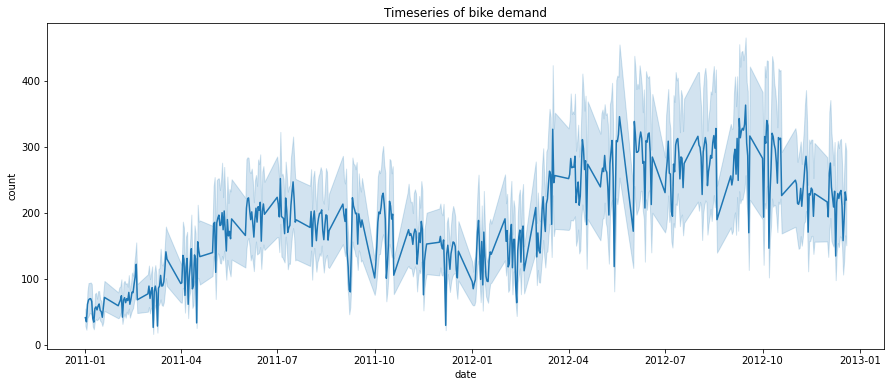

In [10]:
# plot the overall count for entire timeseries
plt.figure(figsize=[15,6])
ax = sns.lineplot(x='date', y='count', data=df)
plt.title('Timeseries of bike demand')
#plt.savefig('../Images/Time series of bike demand.png')

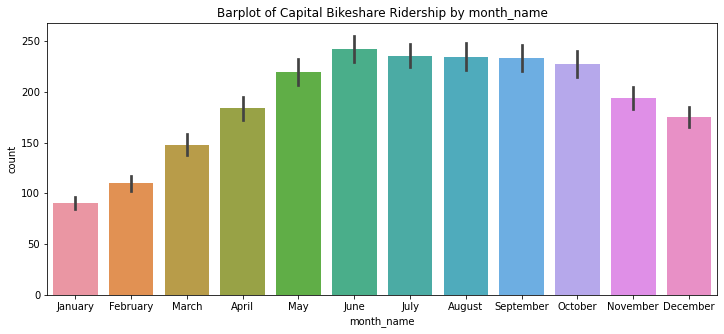

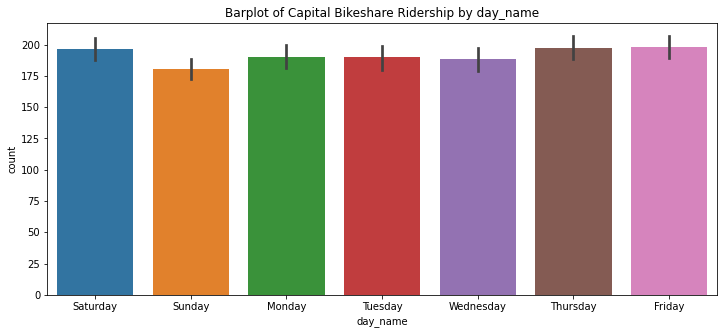

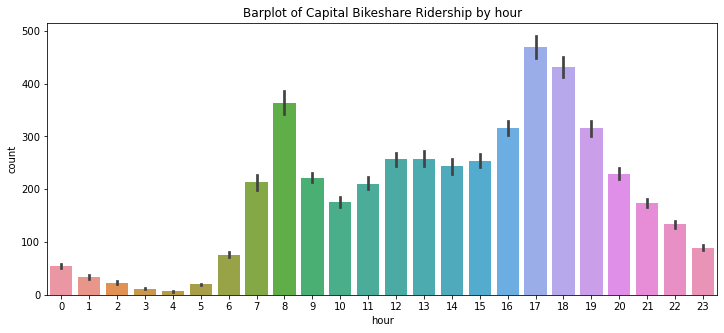

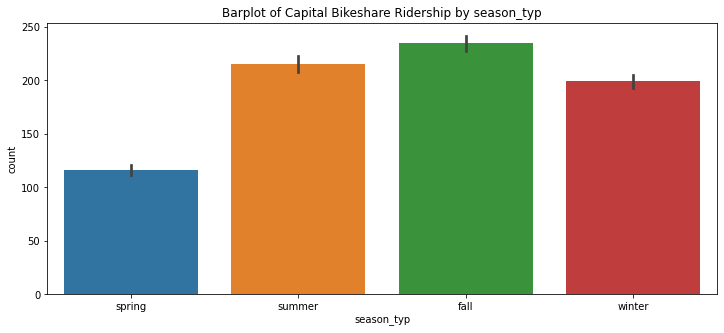

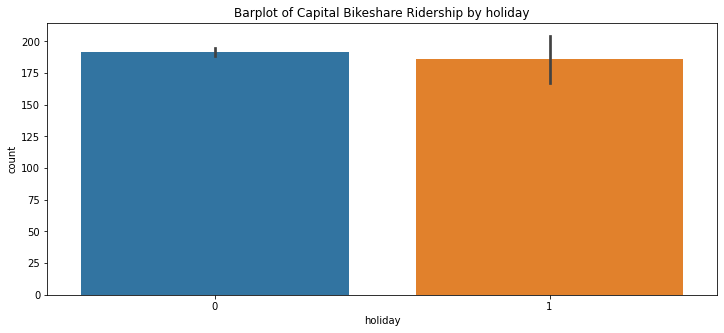

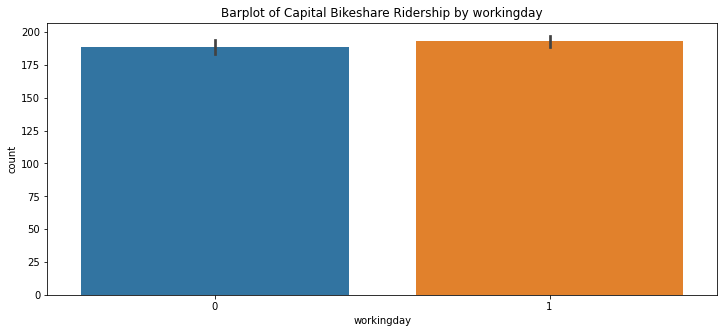

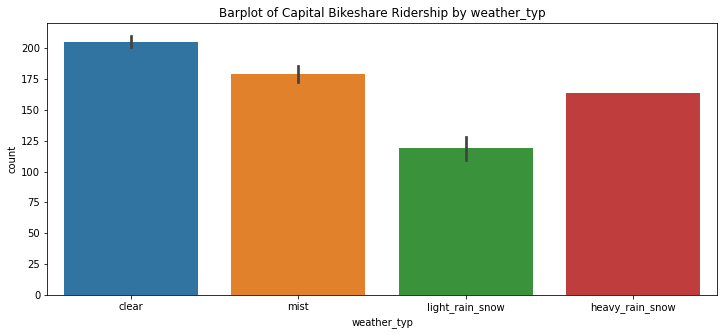

In [11]:
for a in df_cat:
    for b in df_target:
        _ = sns.barplot(x=a,y=b,data=df)
        plt.title('Barplot of Capital Bikeshare Ridership by '+a)
#       plt.savefig('../Images/Barplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

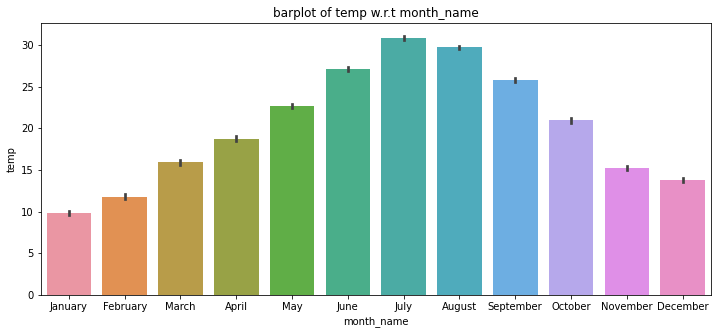

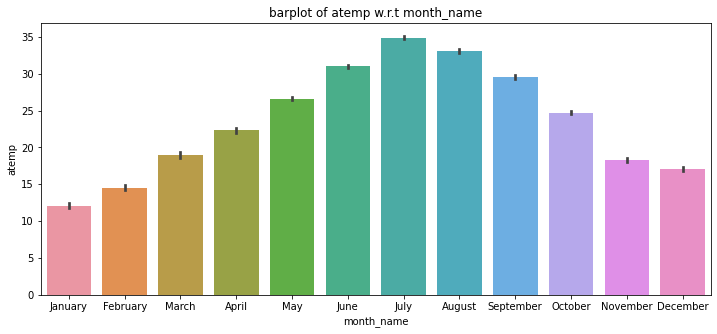

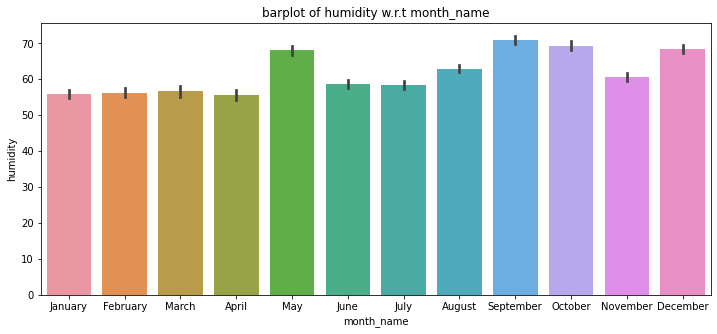

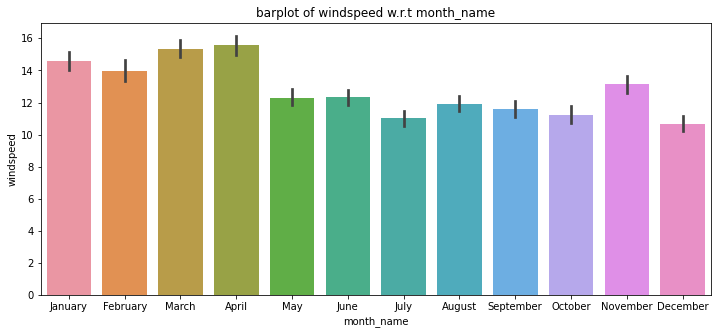

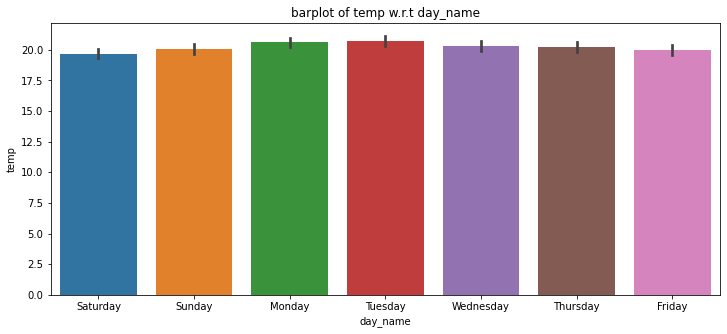

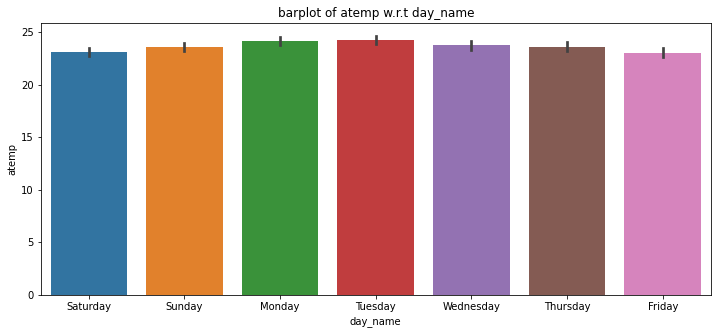

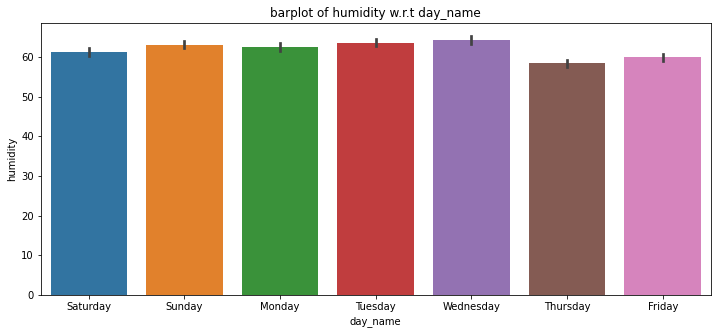

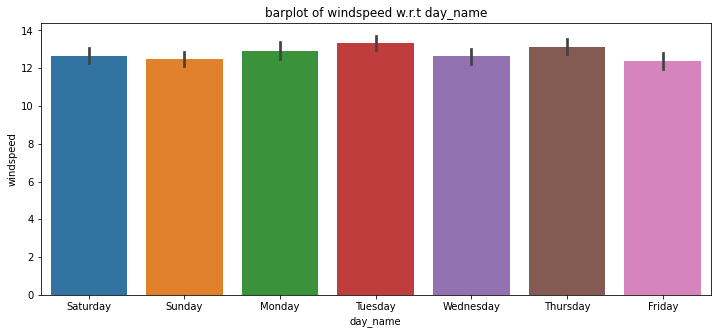

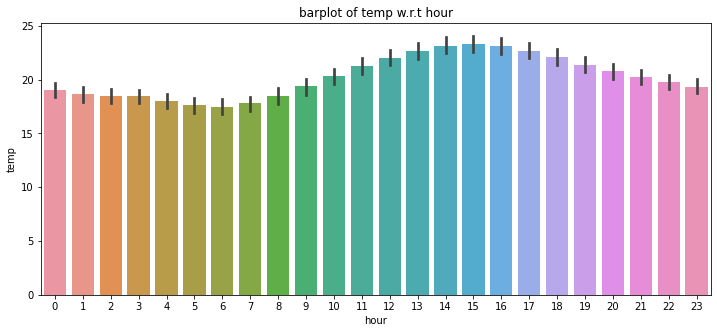

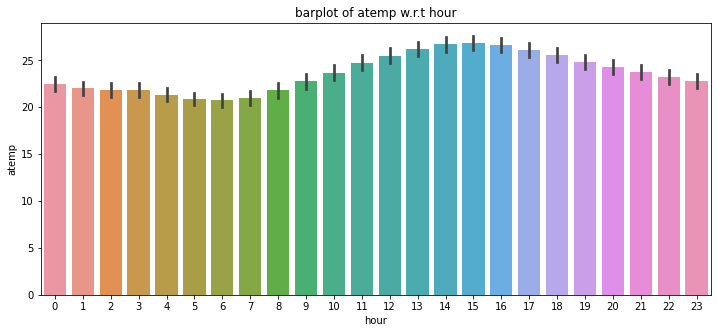

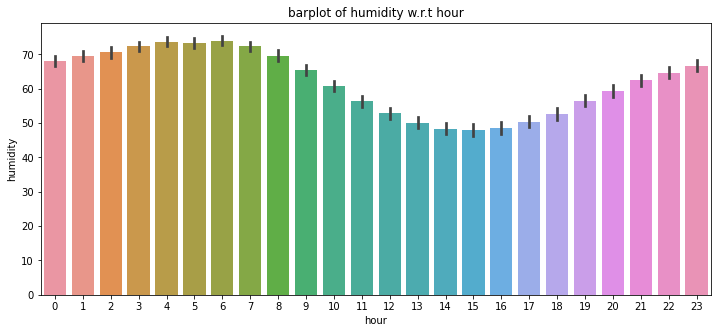

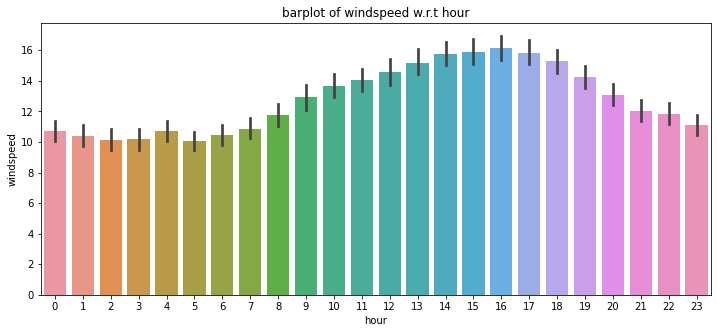

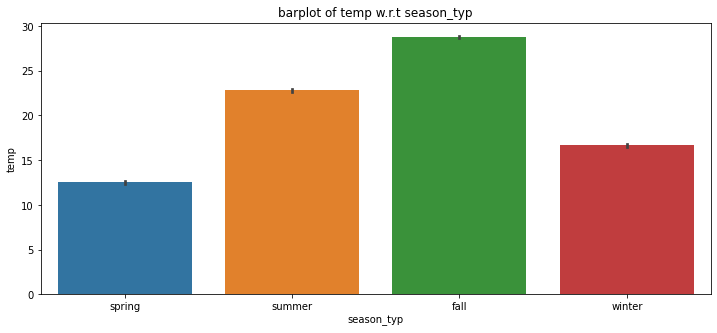

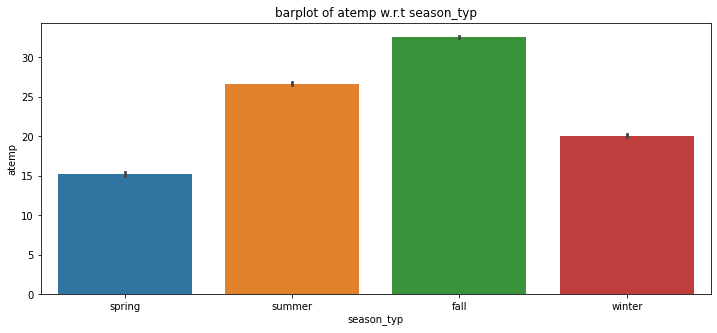

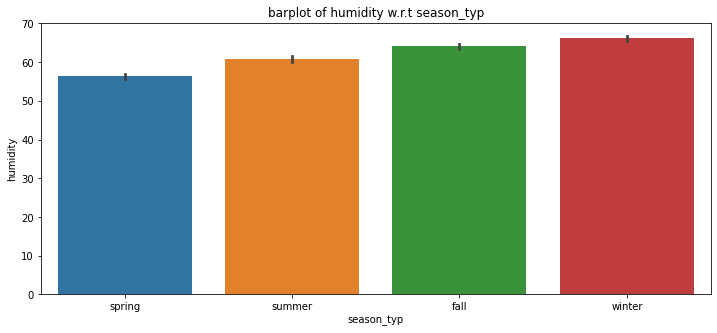

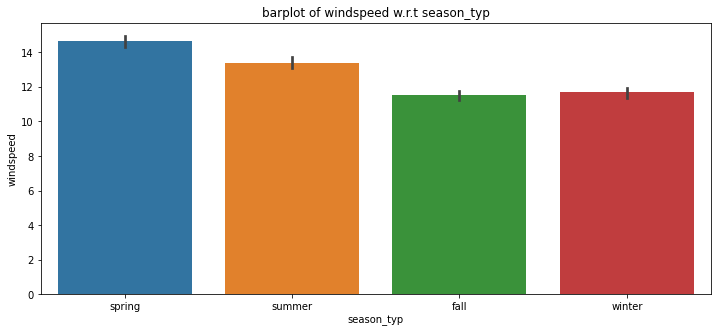

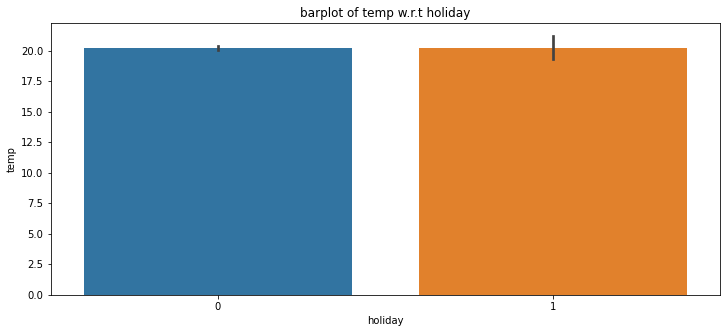

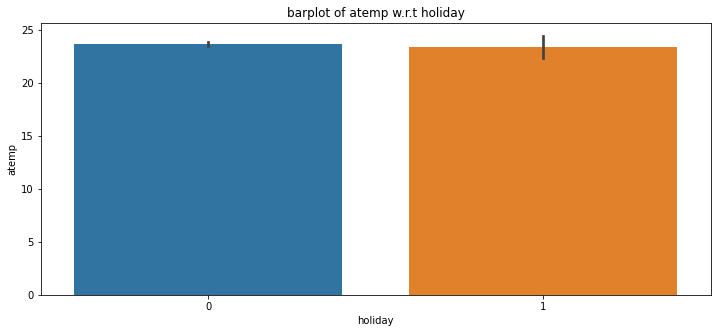

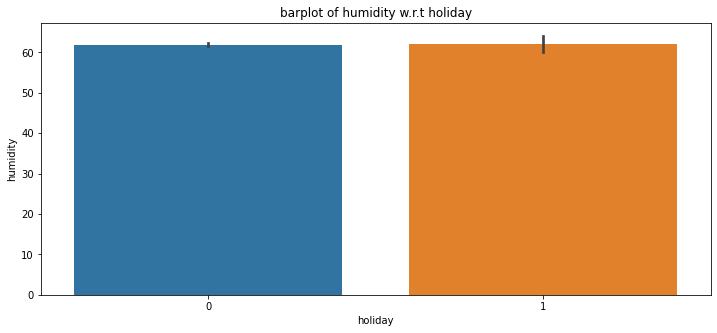

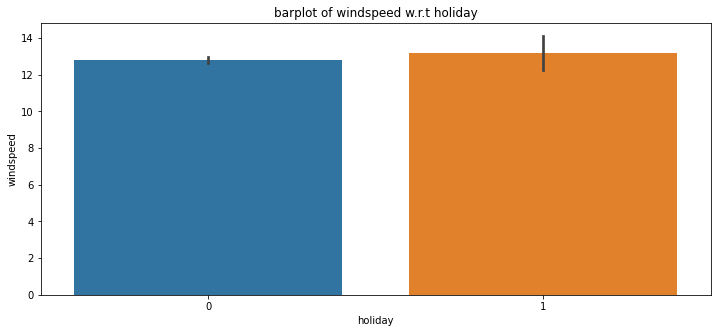

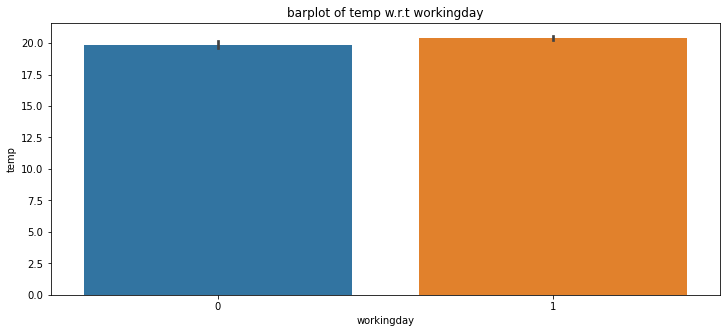

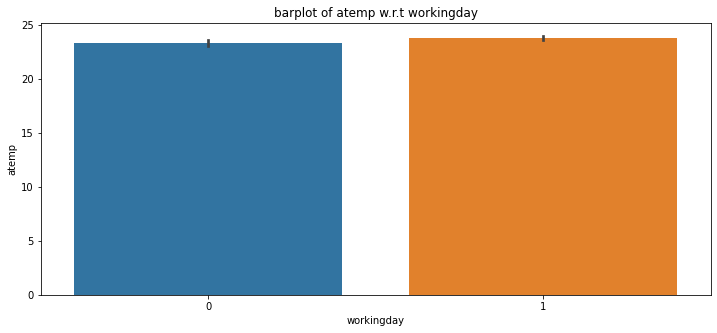

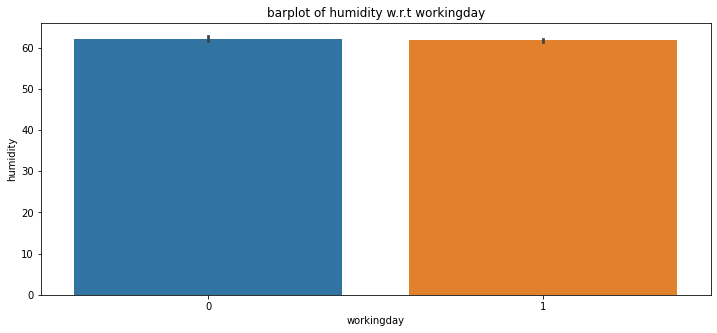

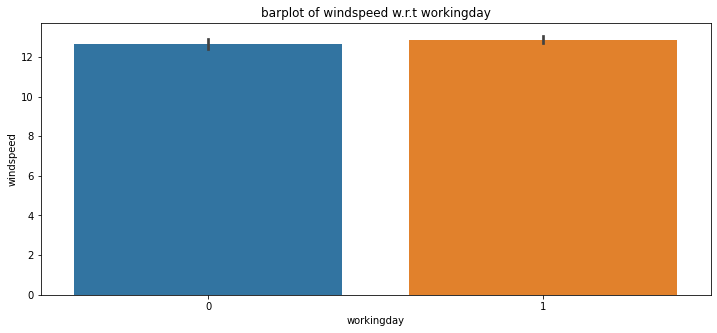

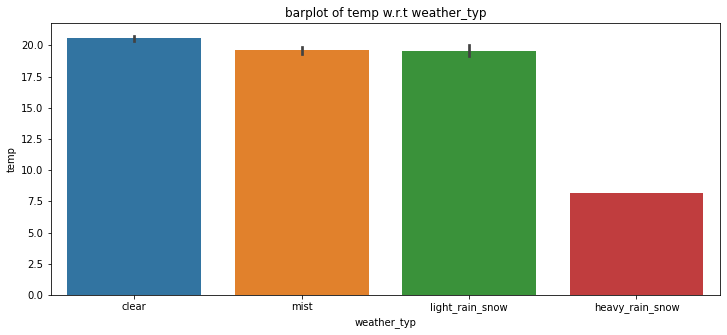

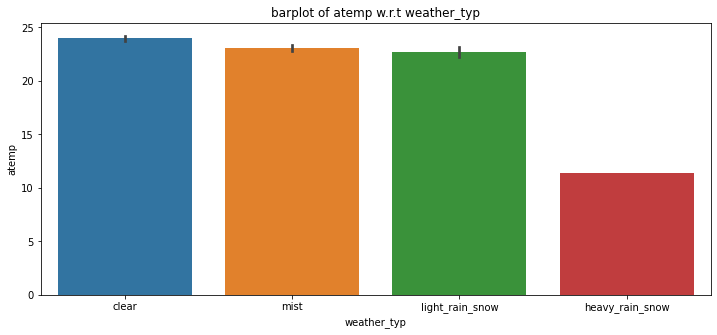

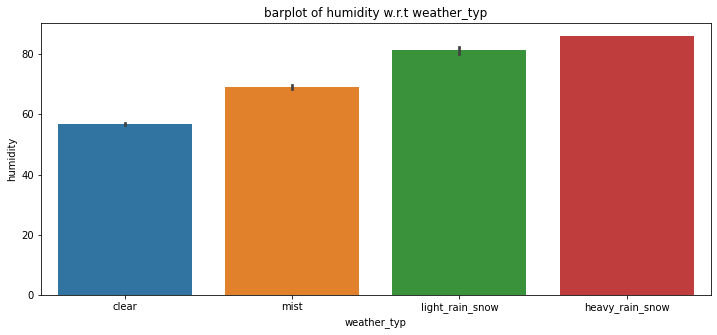

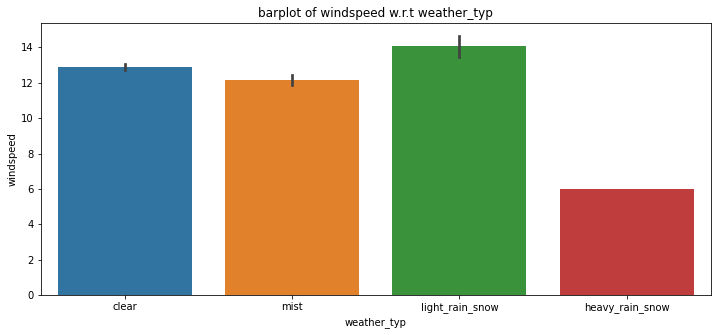

In [12]:
for a in df_cat:
    for b in df_num:
        _ = sns.barplot(x=a,y=b,data=df)
        plt.title('barplot of '+b+' w.r.t '+a)
#       plt.savefig('../Images/barplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

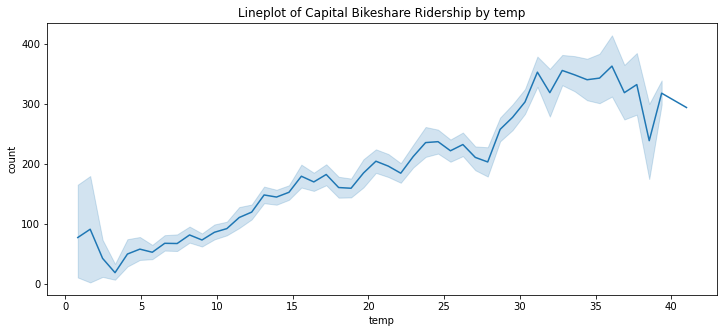

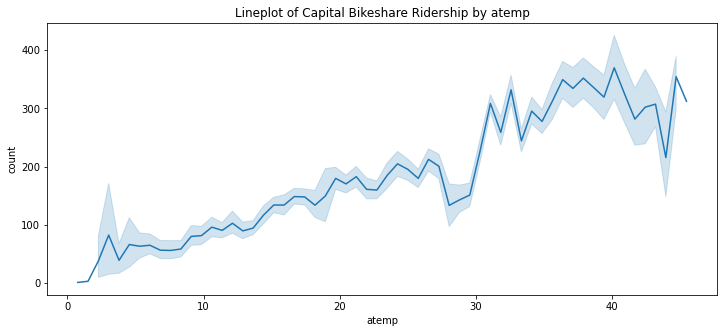

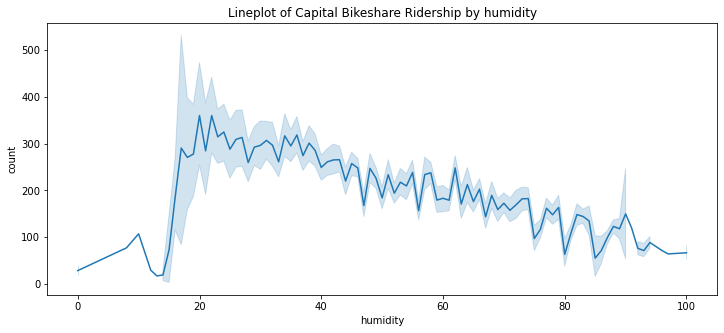

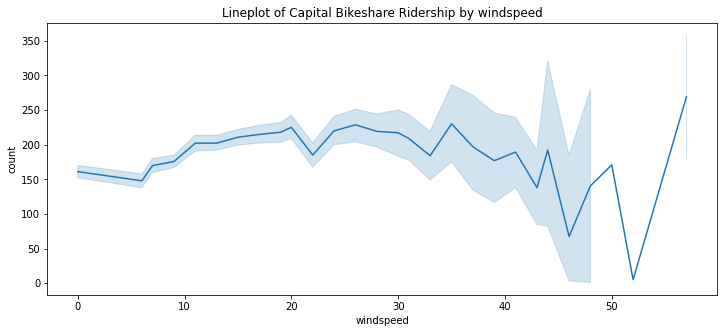

In [13]:
for a in df_num:
    for b in df_target:
        _ = sns.lineplot(x=a,y=b,data=df)
        plt.title('Lineplot of Capital Bikeshare Ridership by '+a)
#       plt.savefig('../Images/Lineplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

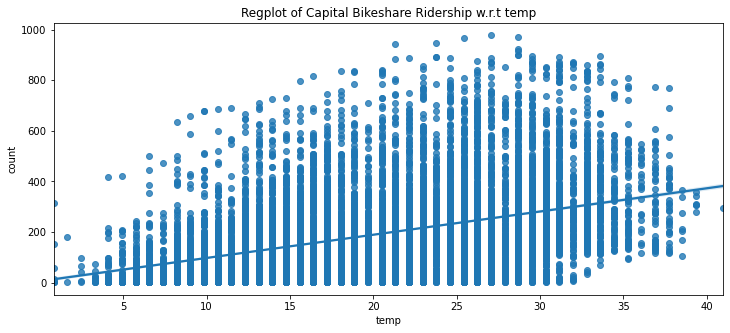

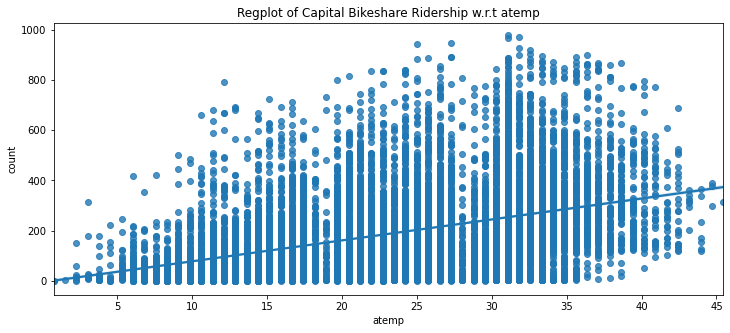

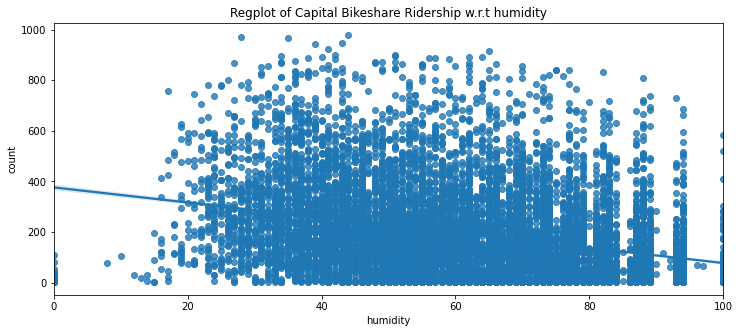

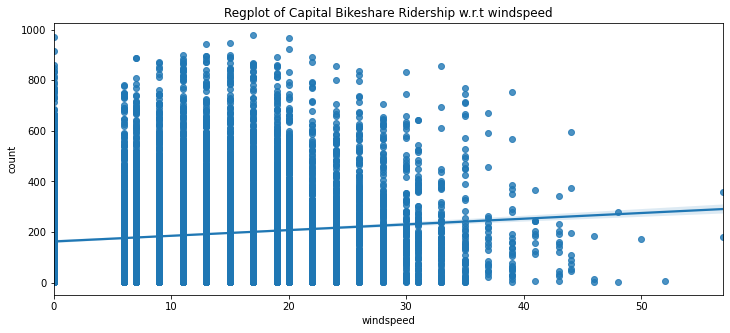

In [14]:
for a in df_num:
    for b in df_target:
        _ = sns.regplot(x=a,y=b,data=df)
        plt.title('Regplot of Capital Bikeshare Ridership w.r.t '+a)
#       plt.savefig('../Images/Regplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

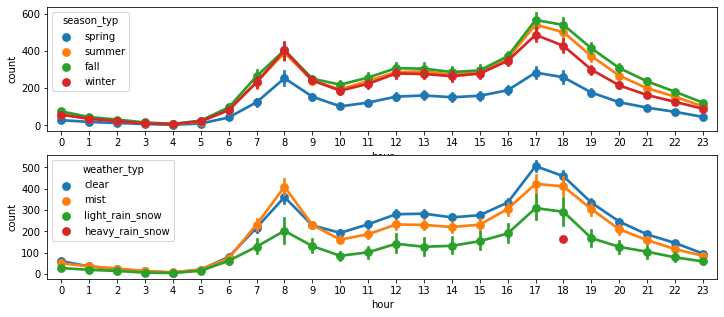

In [15]:
# Capital Bikeshare Ridership by time/hour w.r.t to season/weather
fig,(ax1,ax2) = plt.subplots(nrows=2)
sns.pointplot(data=df[['hour', 'count', 'season_typ']], x='hour', y='count', hue='season_typ', ax=ax1)
sns.pointplot(data=df[['hour', 'count', 'weather_typ']], x='hour', y='count', hue='weather_typ', ax=ax2)

Text(0.5, 1.0, 'Capital Bikeshare Ridership by time/hour w.r.t to day')

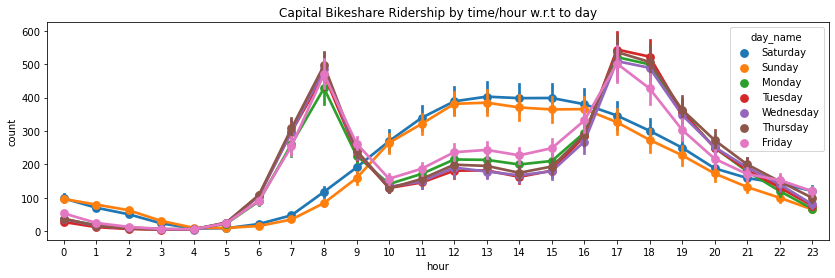

In [16]:
# Capital Bikeshare Ridership by time/hour w.r.t to day
plt.rcParams['figure.figsize'] = [14, 4.0]
fig, ax = plt.subplots()
sns.pointplot(data=df[['hour', 'count', 'day_name']], x='hour', y='count', hue='day_name', ax=ax)
plt.title('Capital Bikeshare Ridership by time/hour w.r.t to day')

**Checking for outliners:**

<AxesSubplot:>

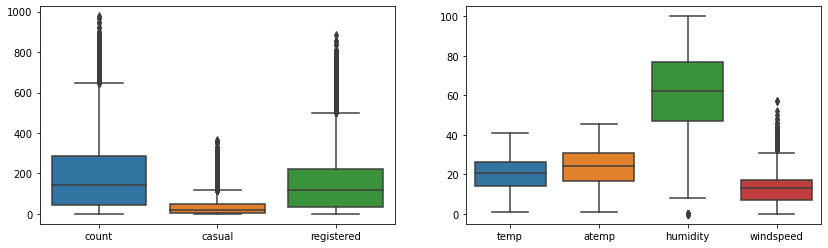

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=df[['count','casual','registered']],ax=ax1)
sns.boxplot(data=df[['temp','atemp','humidity','windspeed']],ax=ax2)

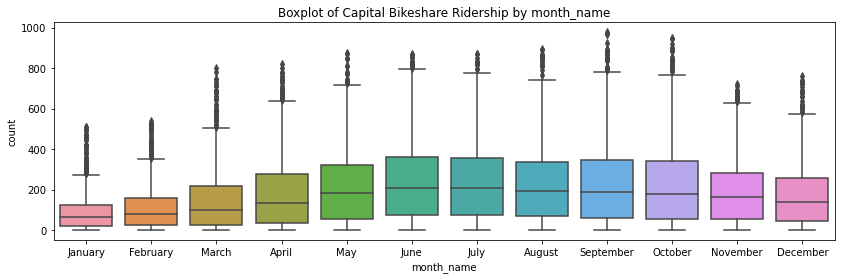

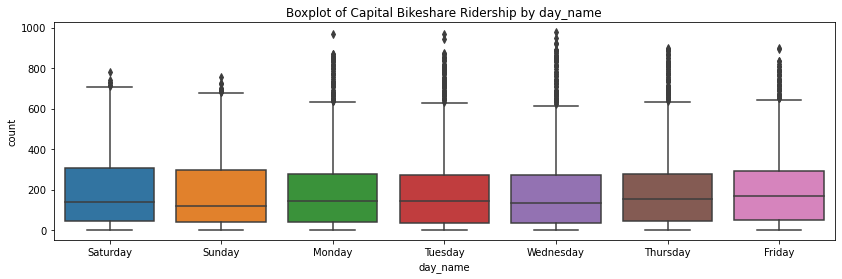

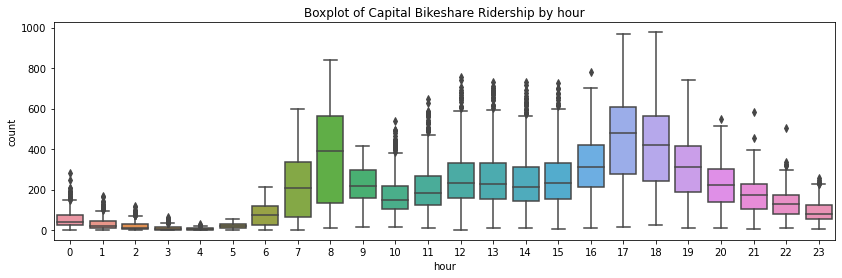

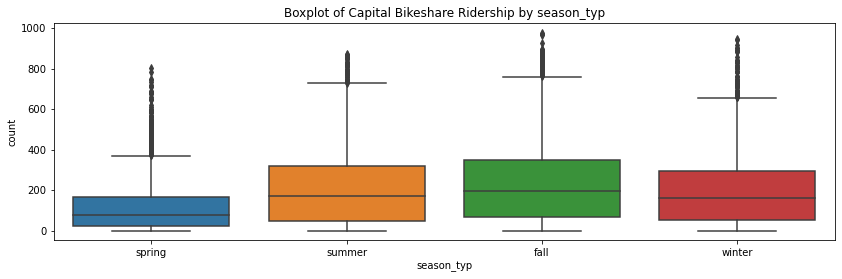

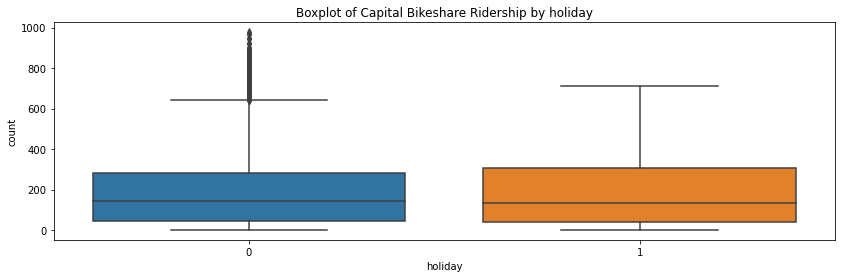

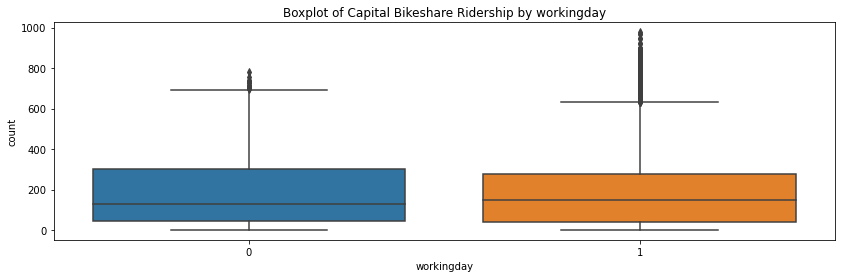

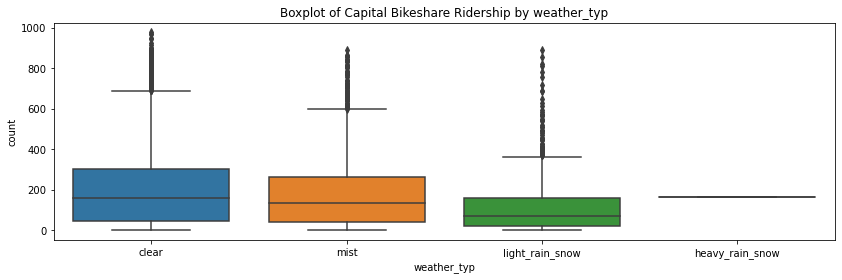

In [18]:
for a in df_cat:
    for b in df_target:
        _ = sns.boxplot(x=a,y=b,data=df)
        plt.title('Boxplot of Capital Bikeshare Ridership by '+a)
#         plt.savefig('../Images/Boxplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

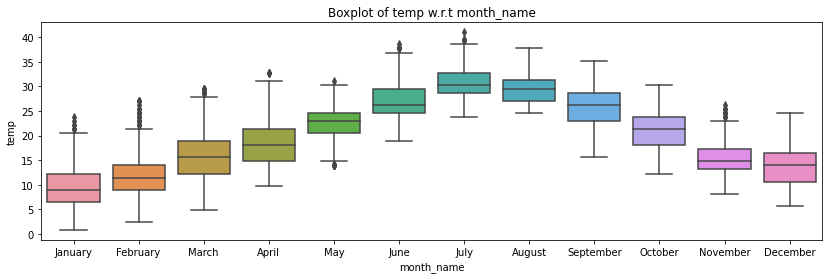

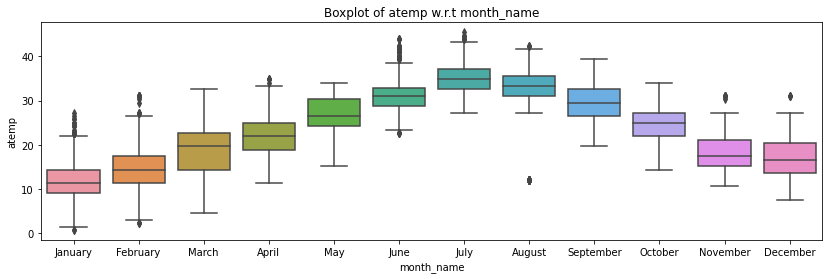

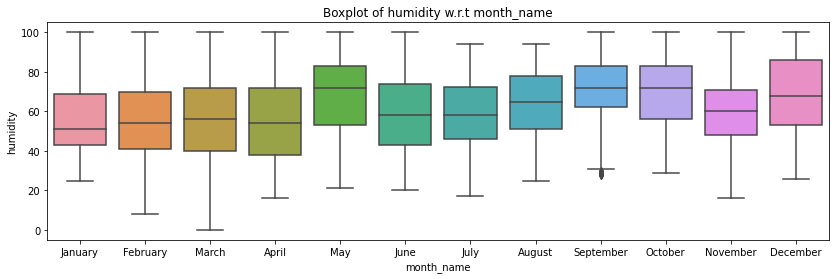

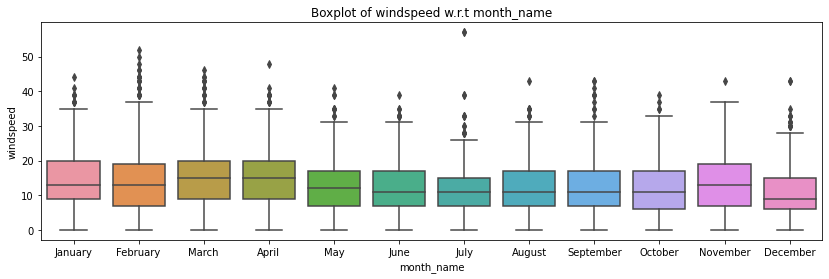

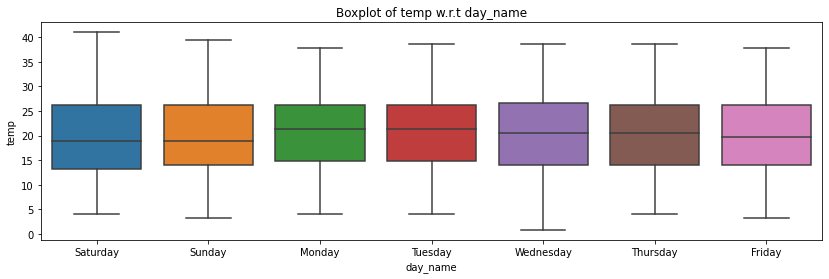

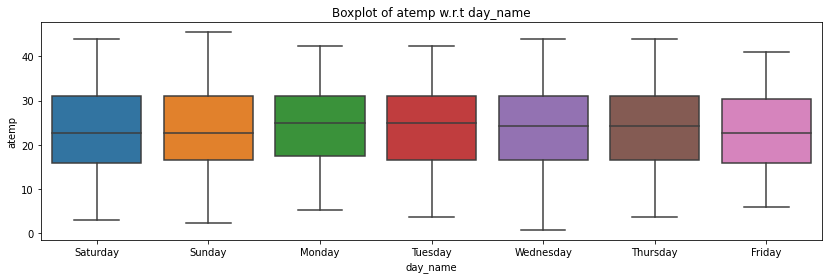

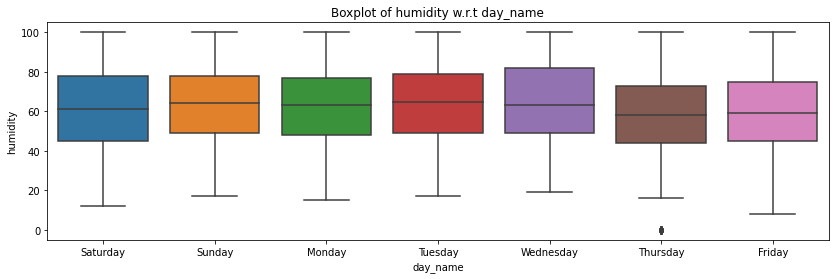

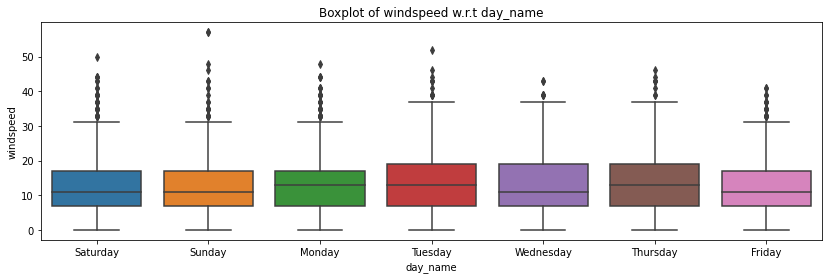

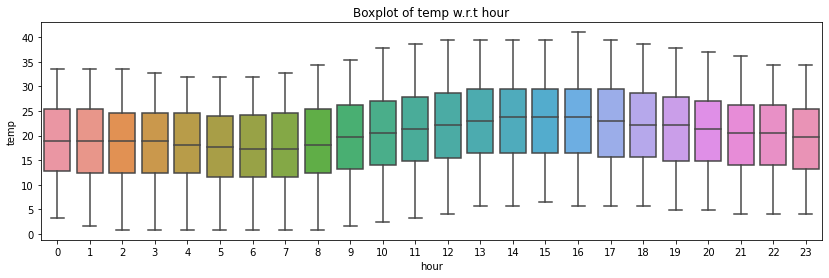

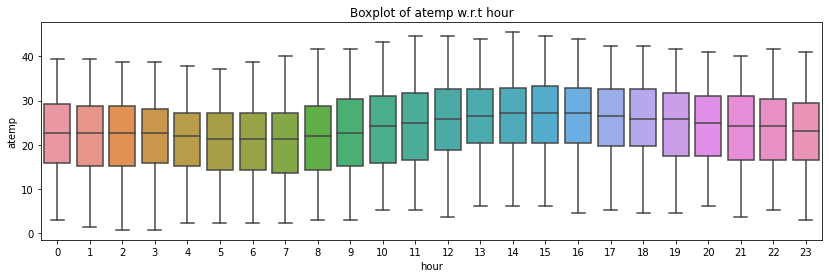

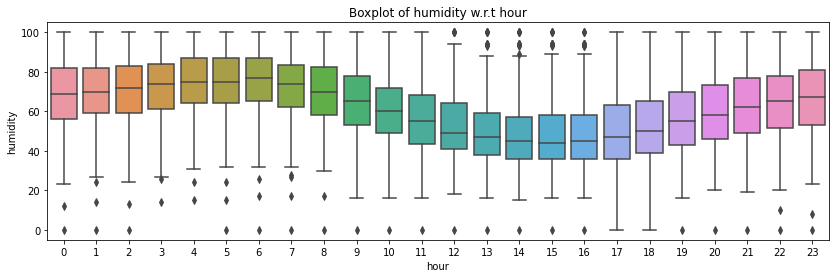

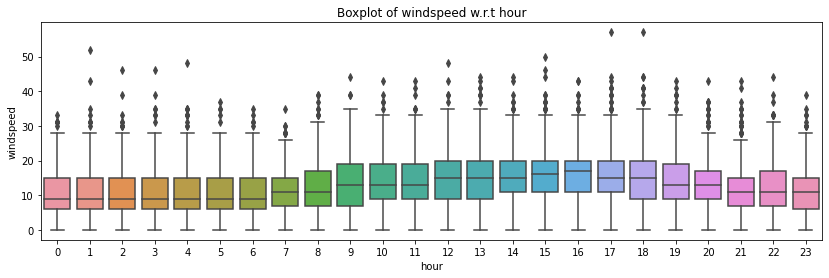

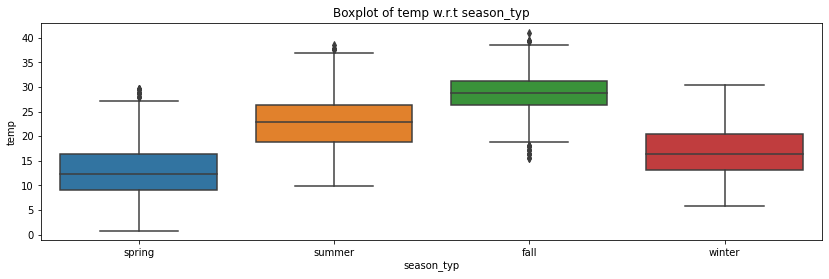

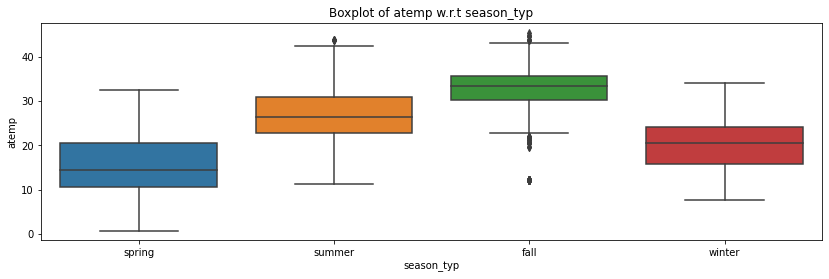

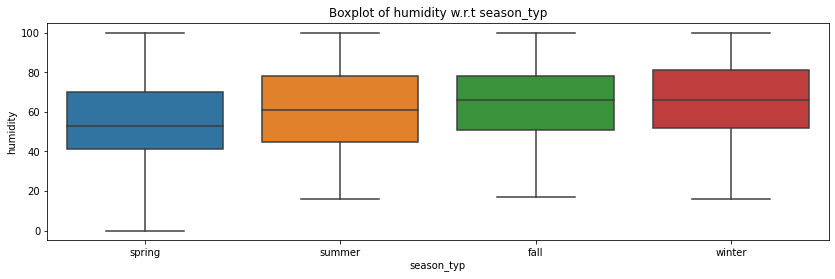

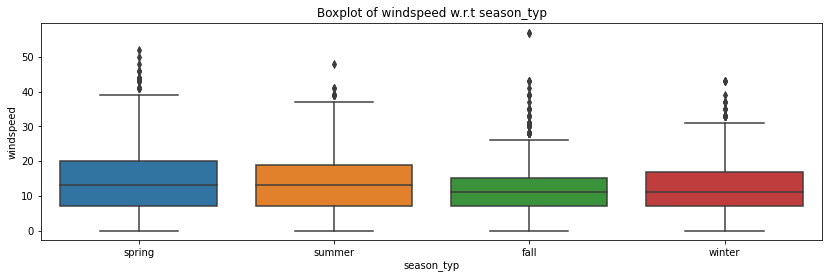

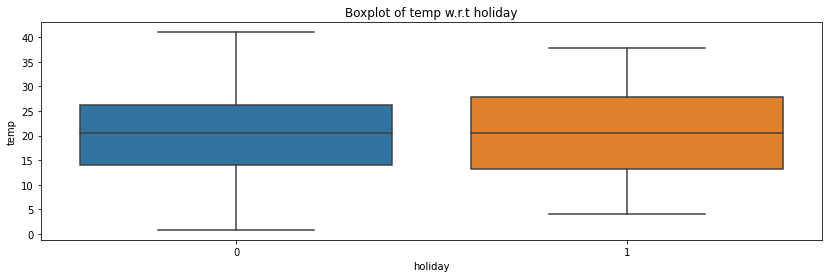

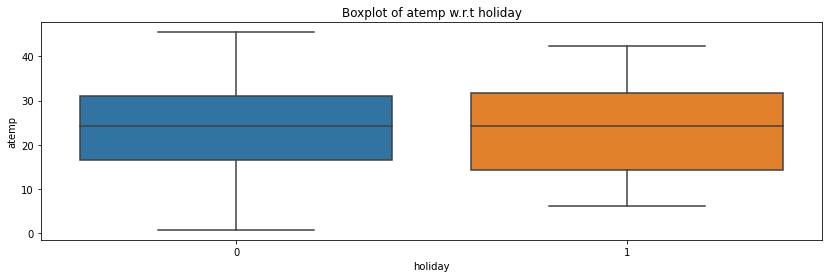

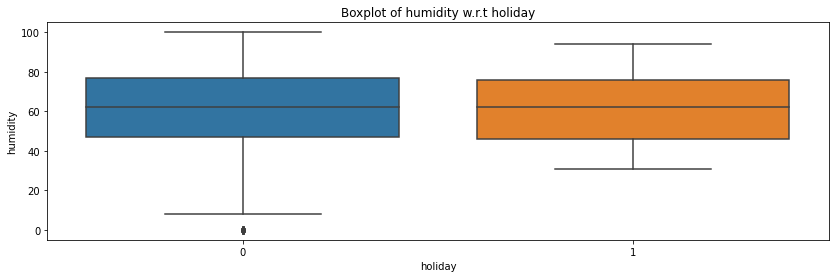

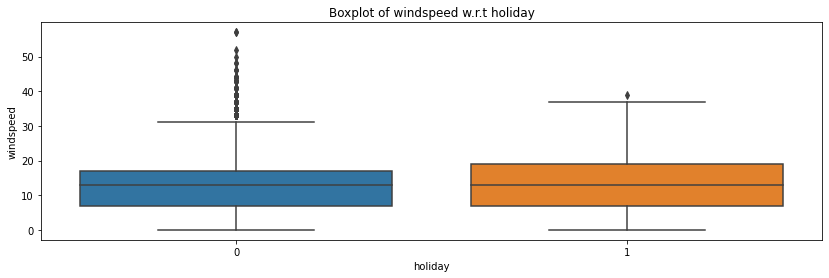

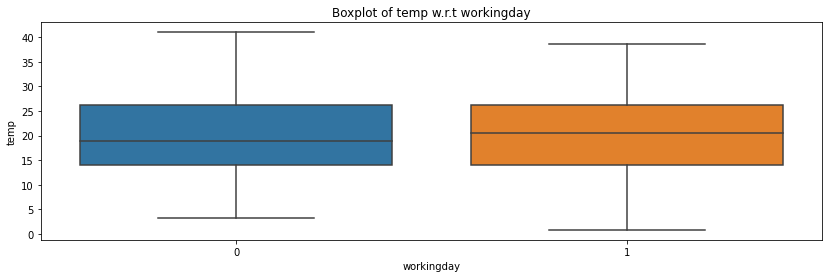

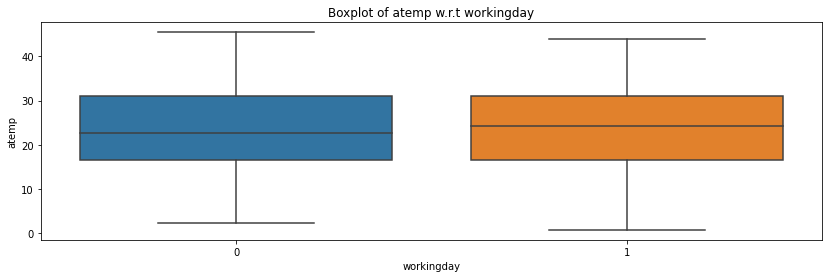

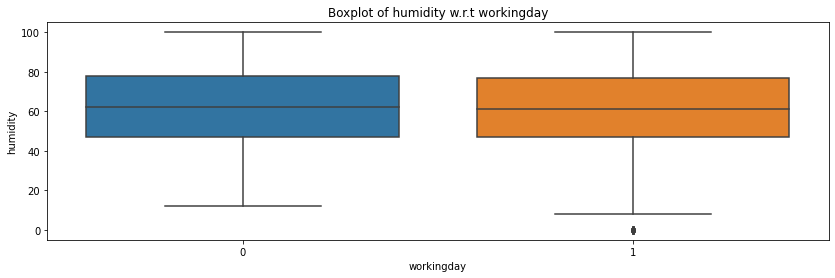

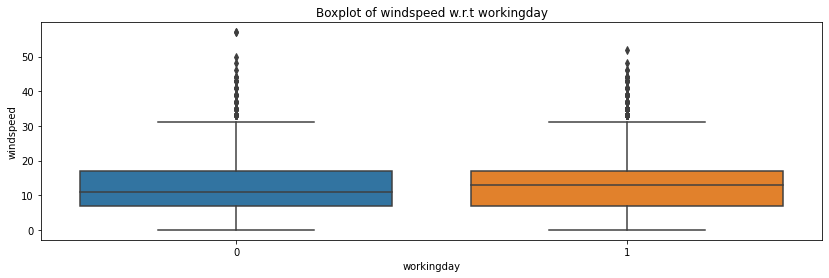

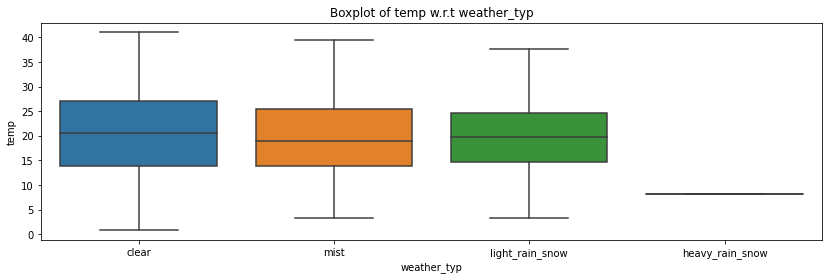

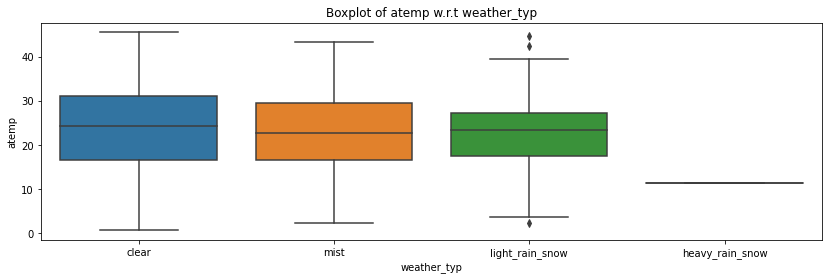

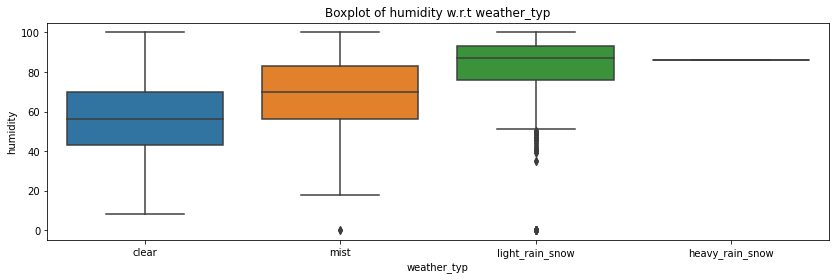

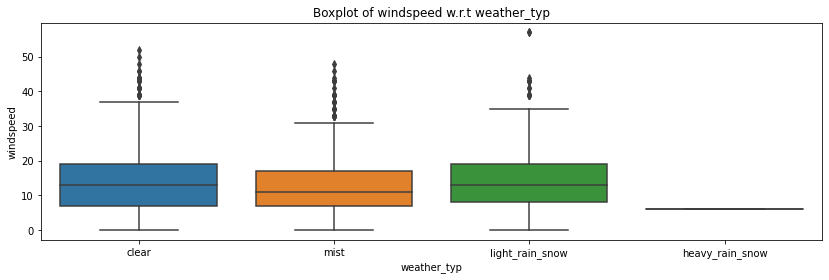

In [19]:
for a in df_cat:
    for b in df_num:
        _ = sns.boxplot(x=a,y=b,data=df)
        plt.title('Boxplot of '+b+' w.r.t '+a)
#       plt.savefig('../Images/Boxplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

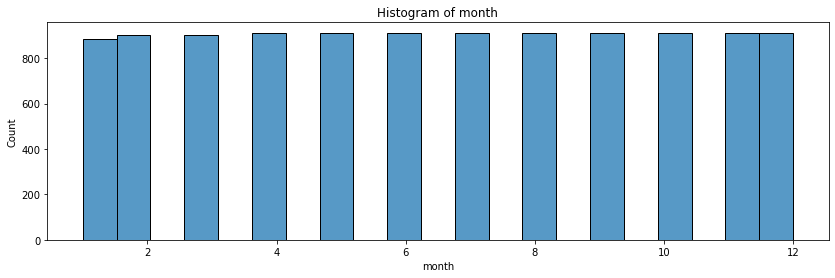

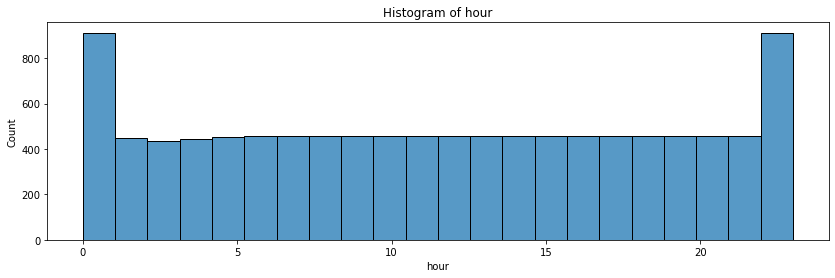

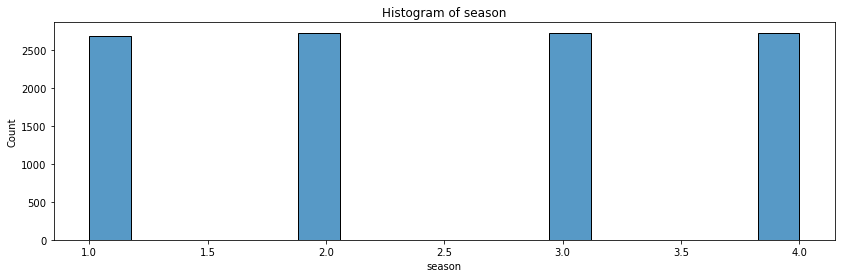

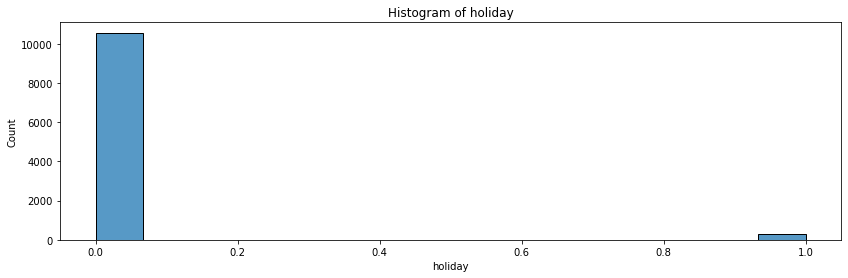

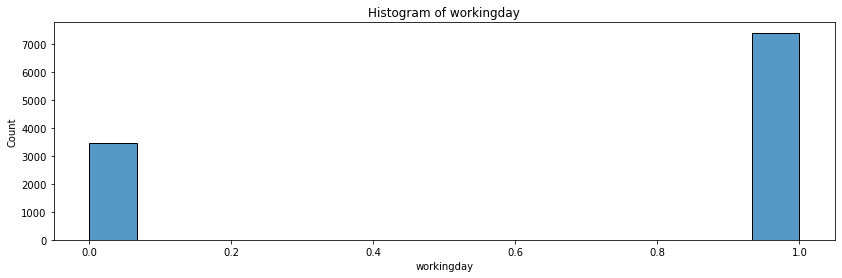

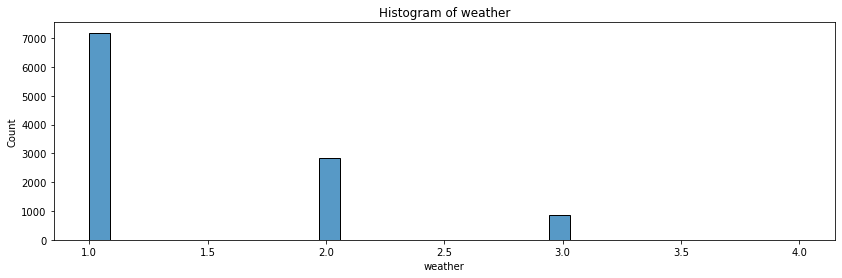

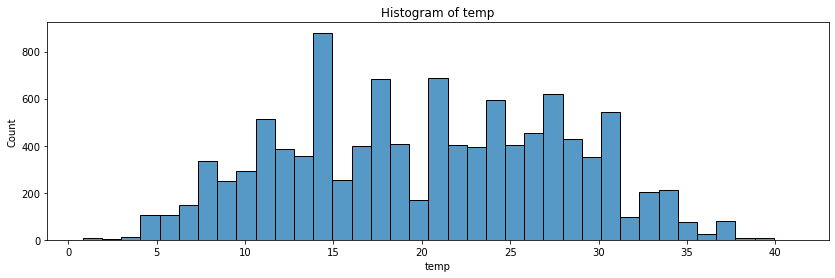

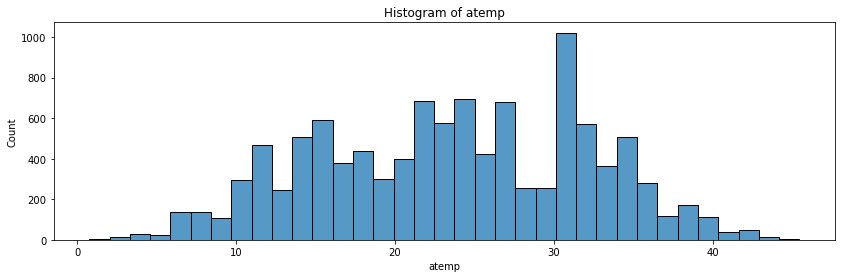

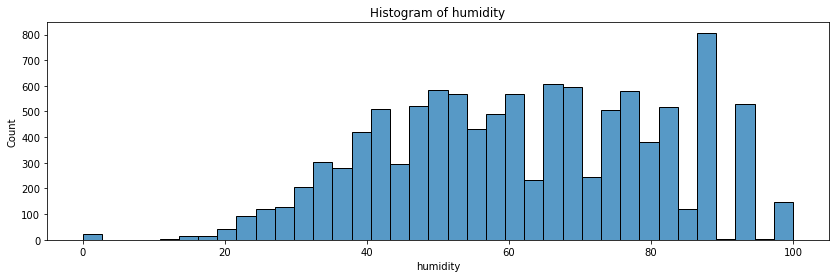

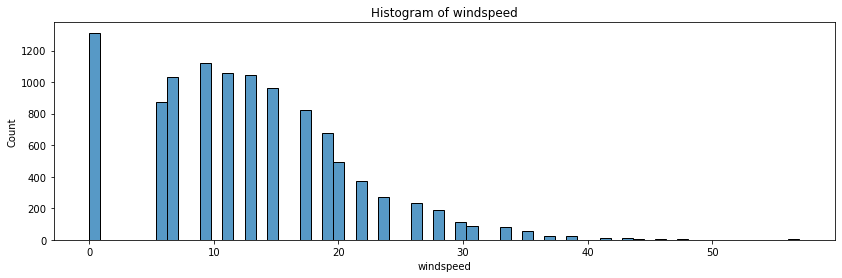

In [20]:
cols = ['month','hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']
for a in cols:
    _ = sns.histplot(x=a,data=df)
    plt.title('Histogram of '+a)
#         plt.savefig('../Images/Histogram of '+str(a)+'.png')
    plt.show()

### Observation from the plots
- Similar trends are observed for all seasons, days, etc. the peak times for trips are at around 8am and 5-6pm, coinciding with ‘rush hour’. 
- Generally, there is lowest demand in the spring months with rising & peak demand in the summer & fall months, and then starts falling in the winter months.
- Season has four categories of almost equal distribution
- Weather 1 has higher contribution i.e. mostly clear weather.
- Variables temp, atemp, humidity and windspeed  looks naturally distributed.
- There is slightly higher demand on working days than holidays or weekends, which might be because people rent bikes to go to work.
- A surprise twist, demand is lowest during light rainy weather than during heavy rain / snowy one, with the highest demand of course during good weather conditions (clear sky).